In [27]:
!sudo apt-get install r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [28]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [29]:
# Install the necessary R packages
%%R
install.packages("ggplot2")
install.packages("dplyr")
install.packages("viridis")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxFiP4z/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxFiP4z/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxFiP4z/downloaded_packages’



In [30]:
%%R
# Load the libraries
library(ggplot2)
library(dplyr)
library(viridis)

In [31]:
%%R
# Load the uploaded dataset in R
crime_data <- read.csv("/content/US_Crime_DataSet.csv")
head(crime_data)


  Record.ID Agency.Code Agency.Name      Agency.Type      City  State Year
1         1     AK00101   Anchorage Municipal Police Anchorage Alaska 1980
2         2     AK00101   Anchorage Municipal Police Anchorage Alaska 1980
3         3     AK00101   Anchorage Municipal Police Anchorage Alaska 1980
4         4     AK00101   Anchorage Municipal Police Anchorage Alaska 1980
5         5     AK00101   Anchorage Municipal Police Anchorage Alaska 1980
6         6     AK00101   Anchorage Municipal Police Anchorage Alaska 1980
    Month Incident             Crime.Type Crime.Solved Victim.Sex Victim.Age
1 January        1 Murder or Manslaughter          Yes       Male         14
2   March        1 Murder or Manslaughter          Yes       Male         43
3   March        2 Murder or Manslaughter           No     Female         30
4   April        1 Murder or Manslaughter          Yes       Male         43
5   April        2 Murder or Manslaughter           No     Female         30
6     May    

In [32]:
%%R
print(colnames(crime_data))

 [1] "Record.ID"             "Agency.Code"           "Agency.Name"          
 [4] "Agency.Type"           "City"                  "State"                
 [7] "Year"                  "Month"                 "Incident"             
[10] "Crime.Type"            "Crime.Solved"          "Victim.Sex"           
[13] "Victim.Age"            "Victim.Race"           "Victim.Ethnicity"     
[16] "Perpetrator.Sex"       "Perpetrator.Age"       "Perpetrator.Race"     
[19] "Perpetrator.Ethnicity" "Relationship"          "Weapon"               
[22] "Victim.Count"          "Perpetrator.Count"     "Record.Source"        


# **Bar Graph: "Number of Crimes by Type"**

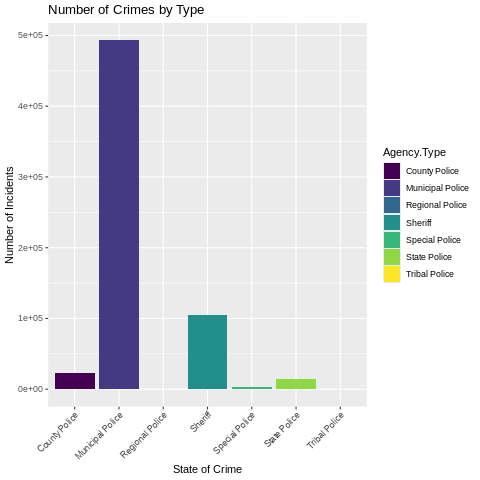

In [33]:
%%R
# Create the bar graph with improved aesthetics
ggplot(crime_data, aes(x = Agency.Type, fill = Agency.Type)) +
  geom_bar() +
  ggtitle("Number of Crimes by Type") +
  xlab("State of Crime") +
  ylab("Number of Incidents") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_viridis(discrete = TRUE)



This plot shows the distribution of crimes across different agency types (police, sheriff's department, etc.). It displays the count of incidents recorded by each type of agency using bars.

The geom_bar() function creates the bars, while the fill color corresponds to each agency type, enhanced by the scale_fill_viridis() function for improved aesthetics.

**X-axis**: The type of agency (Agency.Type).

**Y-axis:** Number of crime incidents.

**Insight:** This plot can help you identify which agency types are handling the most crime cases, giving insights into the crime burden distribution among different law enforcement bodies.

# **Pie Chart: "Crime Distribution by Relationship"**

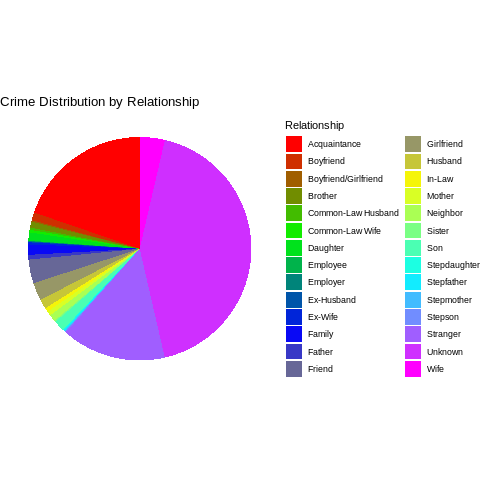

In [34]:
%%R
crime_summary <- crime_data %>%
  group_by(Relationship) %>%
  summarise(Count = n())

# Create a color palette with 28 colors
color_palette <- colorRampPalette(c("#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF", "#FF00FF"))(28)

ggplot(crime_summary, aes(x = "", y = Count, fill = Relationship)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y") +
  ggtitle("Crime Distribution by Relationship") +
  theme_void() +
  scale_fill_manual(values = color_palette)

This chart visualizes the distribution of crimes based on the relationship between the victim and the perpetrator.

Using a polar coordinate system, it creates a circular (pie) chart to represent the proportion of crimes for each relationship type. The color palette enhances the segmentation with clear visual separation between categories.

**Fill:** Different colors represent the relationship types (e.g., acquaintance, stranger, etc.).

**Insight:** This chart provides insight into how often certain relationships (like acquaintance, family, or stranger) are involved in crimes, which can inform preventive measures or investigations.

# **Histogram: "Distribution of Victim Age Groups"**

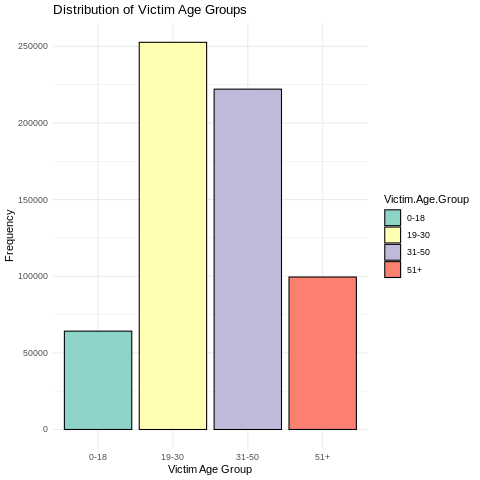

In [35]:
%%R
crime_data$Victim.Age.Group <- cut(crime_data$Victim.Age,
                                    breaks = c(0, 18, 30, 50, Inf),
                                    labels = c("0-18", "19-30", "31-50", "51+"),
                                    right = FALSE)

ggplot(crime_data, aes(x = Victim.Age.Group, fill = Victim.Age.Group)) +
  geom_histogram(stat = "count", color = "black") +
  ggtitle("Distribution of Victim Age Groups") +
  xlab("Victim Age Group") +
  ylab("Frequency") +
  scale_fill_brewer(palette = "Set3") +
  theme_minimal()

This histogram represents the distribution of victims across different age groups.

The Victim.Age.Group is calculated by categorizing victims into age ranges (0-18, 19-30, etc.). The geom_histogram() function counts the number of incidents in each age group.

**X-axis:** Age groups of victims.

**Y-axis:** Frequency (number of victims in each group).

**Insight:** This plot helps identify which age groups are more vulnerable to crime, which could inform law enforcement or public health policies for crime prevention.


# **Scatter Plot: "Perpetrator Count vs. Victim Age"**

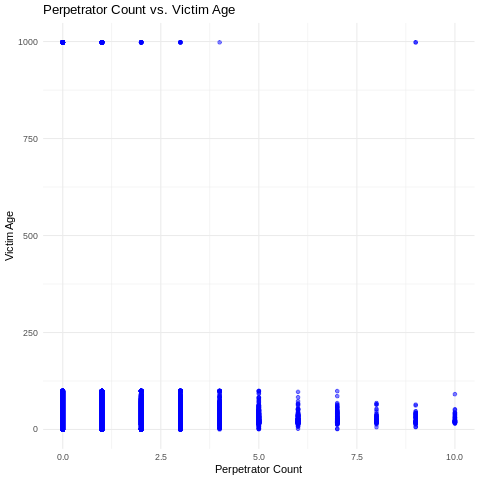

In [36]:
%%R
ggplot(crime_data, aes(x = Perpetrator.Count, y = Victim.Age)) +
  geom_point(color = "blue", alpha = 0.5) +
  ggtitle("Perpetrator Count vs. Victim Age") +
  xlab("Perpetrator Count") +
  ylab("Victim Age") +
  theme_minimal()

This scatter plot explores the relationship between the number of perpetrators and the victim's age. Each point represents an incident, with the size and spread of points indicating the correlation (or lack thereof) between these variables.

**X-axis:** The number of perpetrators involved in a crime.

**Y-axis:** Age of the victim.

**Insight:** The scatter plot shows whether certain age groups tend to have more or fewer perpetrators involved, which might inform strategies for dealing with certain crime patterns.


# **Bubble Chart: "Crime Severity, Response Time, and Frequency"**

`summarise()` has grouped output by 'Crime_Severity'. You can override using
the `.groups` argument.


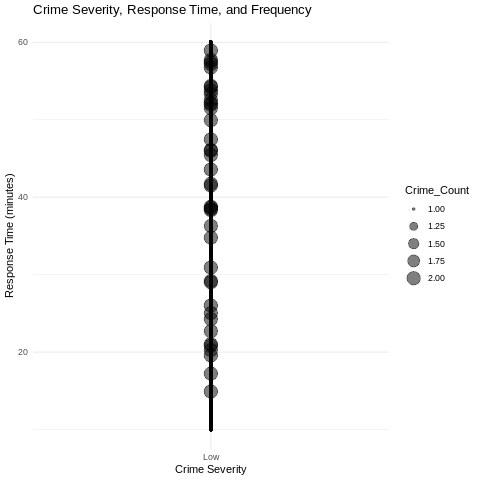

In [37]:
%%R
# Create Crime_Severity based on Crime.Type (example)
crime_data$Crime_Severity <- ifelse(crime_data$Crime.Type %in% c("Murder", "Rape"), "High",
                                   ifelse(crime_data$Crime.Type %in% c("Robbery", "Aggravated Assault"), "Medium", "Low"))

# Generate random Police_Response_Time (example)
crime_data$Police_Response_Time <- runif(nrow(crime_data), 10, 60)

# Calculate Crime_Count
crime_summary <- crime_data %>%
  group_by(Crime_Severity, Police_Response_Time) %>%
  summarise(Crime_Count = n())

# Create the bubble chart
ggplot(crime_summary, aes(x = Crime_Severity, y = Police_Response_Time, size = Crime_Count)) +
  geom_point(alpha = 0.5) +
  ggtitle("Crime Severity, Response Time, and Frequency") +
  xlab("Crime Severity") +
  ylab("Response Time (minutes)") +
  theme_minimal()

This bubble chart displays the relationship between crime severity and police response time, with the size of the bubbles representing the frequency of crimes.

Crime severity is divided into "High," "Medium," and "Low" based on the crime type.

**X-axis:** Crime severity (e.g., "High" for murder or rape).

**Y-axis:** Average police response time (in minutes).

**Bubble size:** Frequency of crimes for each category.

**Insight:** This plot highlights the response times for different crime severities and the frequency of those crimes. It can reveal if there is a noticeable delay in response time for more or less severe crimes.

# **Line Chart: "Crime Trend Over Time"**

[1] 1 3 3 4 4 5


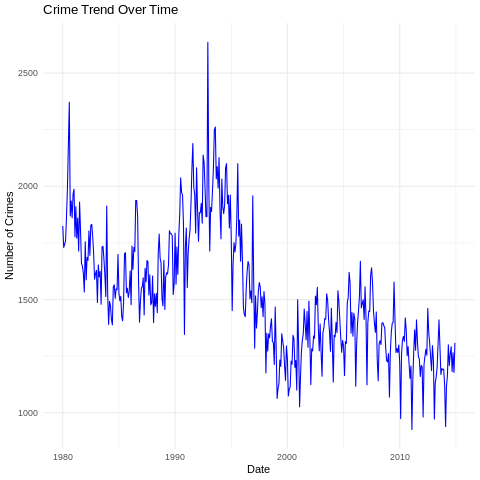

In [38]:
%%R

# Convert Month names to numeric format
crime_data$Month <- match(crime_data$Month, month.name)

# Check if Month column was correctly converted
print(head(crime_data$Month))

# Concatenate Year and Month to form a Date string, assuming Month is now numeric
crime_data$Date <- as.Date(paste(crime_data$Year, crime_data$Month, "01", sep = "-"), format = "%Y-%m-%d")

# Aggregate data by Date (assuming each row represents an incident)
crime_trend <- crime_data %>%
  group_by(Date) %>%
  summarise(Crime_Count = n())  # Count of crimes per month

# Create the line chart
ggplot(crime_trend, aes(x = Date, y = Crime_Count)) +
  geom_line(color = "blue") +
  ggtitle("Crime Trend Over Time") +
  xlab("Date") +
  ylab("Number of Crimes") +
  theme_minimal()


This line chart shows the trend in the number of crimes over time. After converting the Year and Month into a valid date format, the data is aggregated by date to plot the number of crimes occurring each month.

**X-axis:** Time (Year-Month combination).

**Y-axis:** Number of crime incidents.

**Insight:** The line chart allows you to observe trends over time, such as increases or decreases in crime rates, potentially influenced by socio-economic factors, law enforcement policies, or other variables.